In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_file

# Define directories for training and validation data
train_dir = '/content/drive/MyDrive/Colab Notebooks/archive/chest_xray/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/archive/chest_xray/val'
test_dir = '/content/drive/MyDrive/Colab Notebooks/archive/chest_xray/test'

# Create separate ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#load validation data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'  # or 'binary' since there are two classes
)

# Load validation data
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'  # or 'binary'
)
# Load test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'  # or 'binary'
)

# Display the counts to verify
print(f"Found {train_data.samples} images in training data.")
print(f"Found {val_data.samples} images in validation data.")
print(f"Found {test_data.samples} images in test data.")


Found 5223 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 5223 images in training data.
Found 16 images in validation data.
Found 624 images in test data.


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Adjust output for binary classification if necessary
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust epochs as needed
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


327/327 ━━━━━━━━━━━━━━━━━━━━ 364s 954ms/step - accuracy: 0.8592 - loss: 0.7102 - val_accuracy: 0.8125 - val_loss: 0.5040
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.9757 - loss: 0.0796 - val_accuracy: 0.8750 - val_loss: 0.1439
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 352s 940ms/step - accuracy: 0.9839 - loss: 0.0525 - val_accuracy: 0.8750 - val_loss: 0.2487
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 305s 927ms/step - accuracy: 0.9917 - loss: 0.0294 - val_accuracy: 0.7500 - val_loss: 0.7120
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 307s 933ms/step - accuracy: 0.9887 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 0.0223
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 316s 915ms/step - accuracy: 0.9890 - loss: 0.0275 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 303s 917ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.8750 - val_loss: 0.1425
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 318s 909ms/step - accuracy: 0.9893 - loss: 0.0274 

In [57]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.7313 - loss: 2.6181
Test accuracy: 0.754807710647583
Test loss: 2.4603240489959717


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted probabilities:
 [[0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.74 0.26]
 [0.   1.  ]
 [0.17 0.83]
 [0.7  0.3 ]
 [0.   1.  ]
 [0.04 0.96]
 [0.   1.  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted classes:
 [1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1]


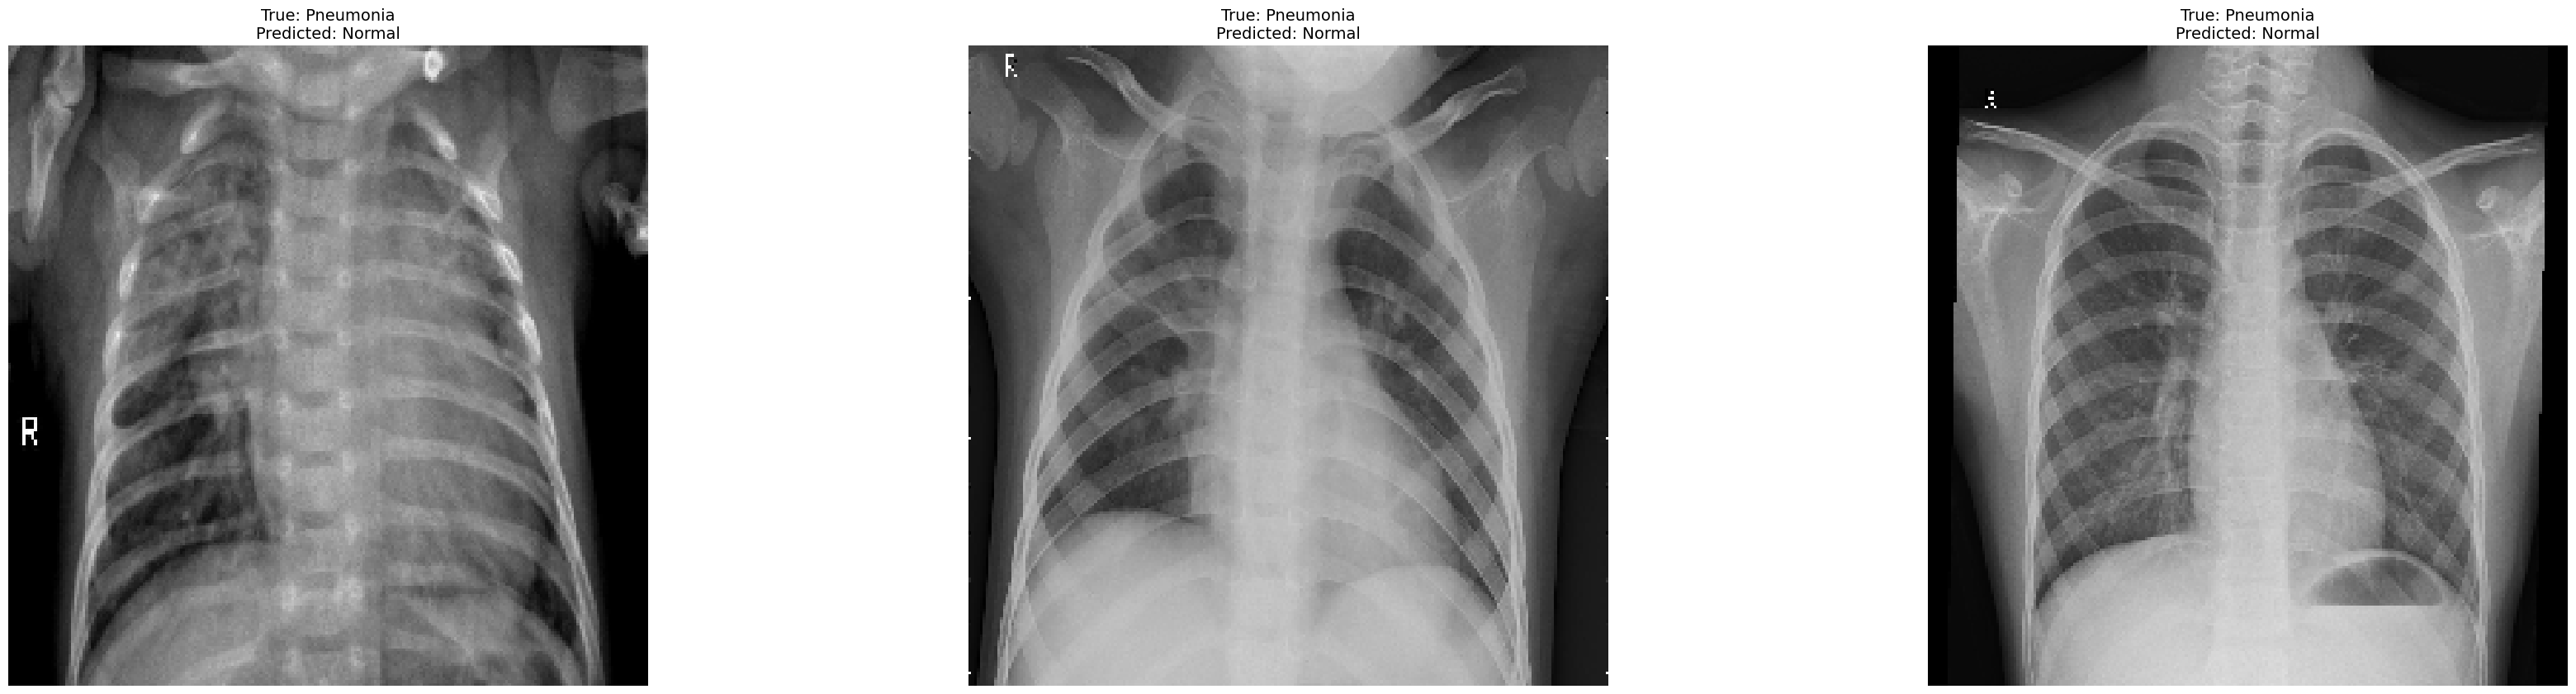

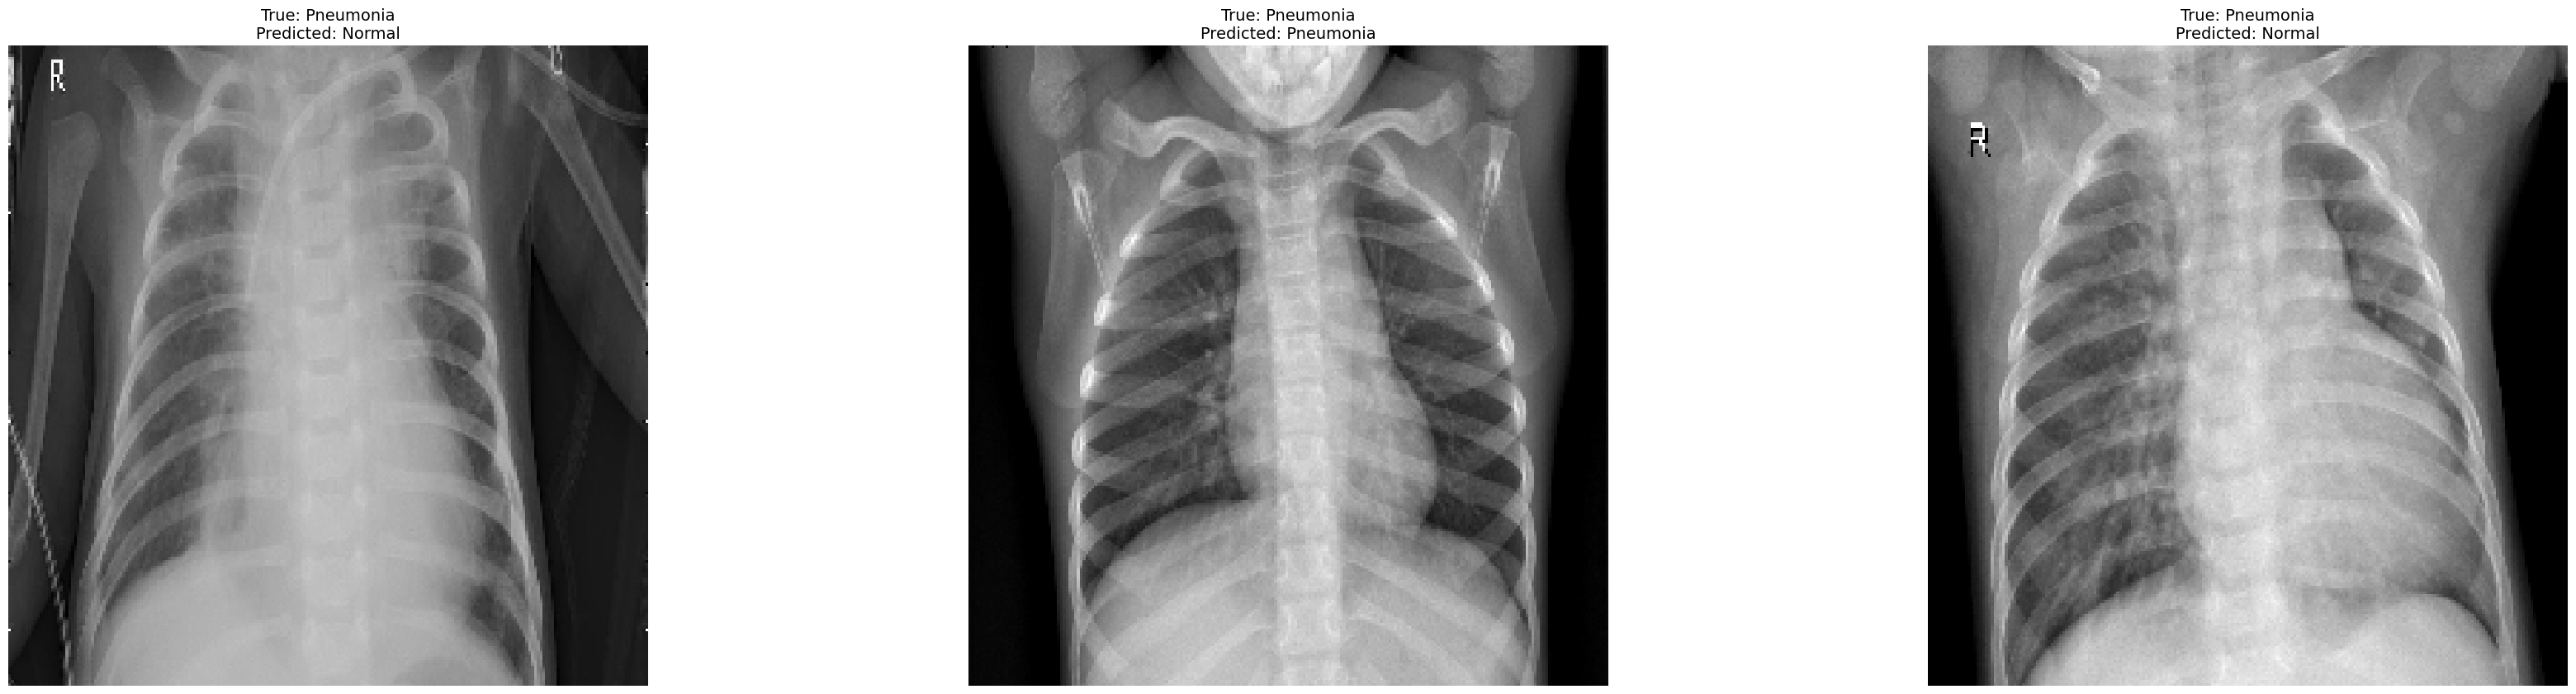

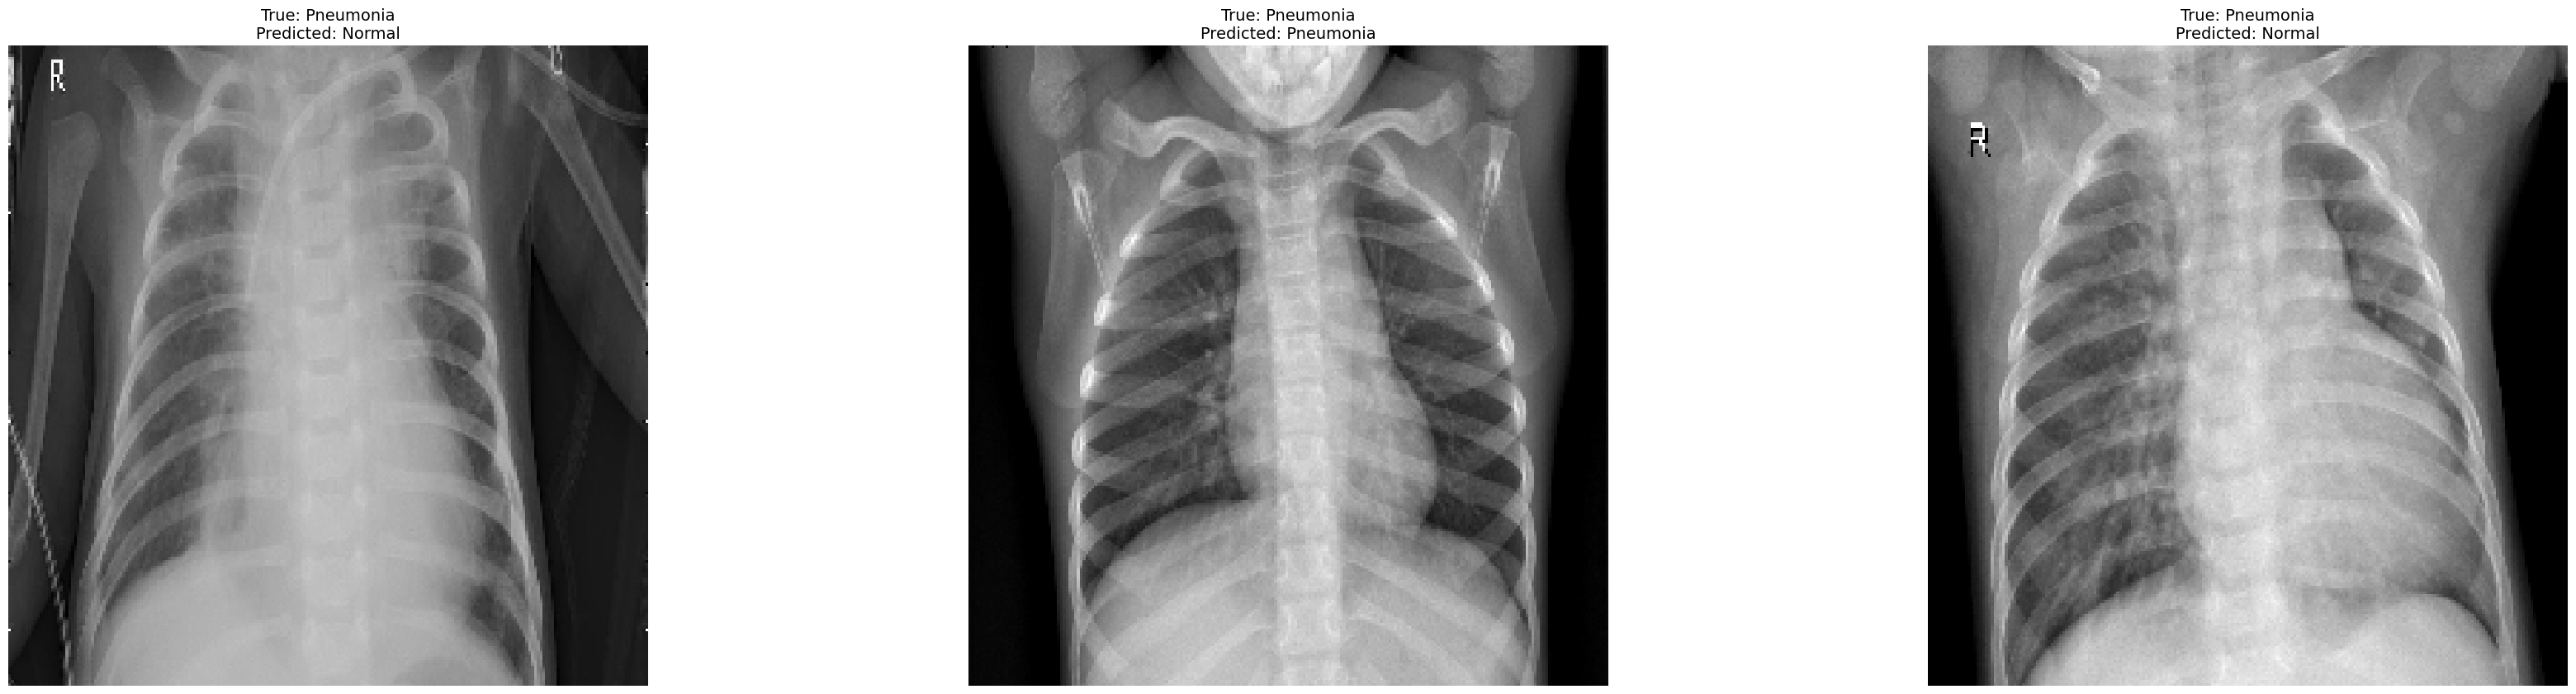

In [81]:
# Extract some test data samples for evaluation
X_new, _ = next(test_data)

# Predict probabilities
y_proba = model.predict(X_new)
print("Predicted probabilities:\n", y_proba.round(2))

# Get predicted class labels
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("Predicted classes:\n", y_pred)

# Class names as defined earlier
class_names = ["Pneumonia", "Normal"]

# Display the images along with their predicted and true class labels
num_images = len(X_new)

# Split the images into two sets of three for separate figures
fig, axes = plt.subplots(1, 3, figsize=(40, 30), squeeze=False)
for index, ax in enumerate(axes.flatten()):  # Flatten axes to iterate correctly
    ax.imshow(X_new[index], cmap="binary", interpolation="nearest")
    ax.axis('off')
    # Adjust the title to separate the true and predicted labels with a newline
    ax.set_title(f"True: {class_names[test_data.classes[index]]}\nPredicted: {class_names[y_pred[index]]}", fontsize=14)

# Adjust the spacing between columns for better layout
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/figure1.png')  # Save first set of images
plt.show()

# Now create the second figure with remaining images
fig, axes = plt.subplots(1, 3, figsize=(40, 30), squeeze=False)
for index, ax in enumerate(axes.flatten()):
    ax.imshow(X_new[index + 3], cmap="binary", interpolation="nearest")  # Start from the fourth image
    ax.axis('off')
    # Adjust the title to separate the true and predicted labels with a newline
    ax.set_title(f"True: {class_names[test_data.classes[index + 3]]}\nPredicted: {class_names[y_pred[index + 3]]}", fontsize=14)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/figure2.png')  # Save second set of images
plt.show()
# Now create the second figure with remaining images
fig, axes = plt.subplots(1, 3, figsize=(40, 30), squeeze=False)
for index, ax in enumerate(axes.flatten()):
    ax.imshow(X_new[index + 3], cmap="binary", interpolation="nearest")  # Start from the fourth image
    ax.axis('off')
    # Adjust the title to separate the true and predicted labels with a newline
    ax.set_title(f"True: {class_names[test_data.classes[index + 3]]}\nPredicted: {class_names[y_pred[index + 3]]}", fontsize=14)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/figure3.png')  # Save second set of images
plt.show()

In [41]:
!ls /content/drive/MyDrive/Colab\ Notebooks/archive/chest_xray/val/PNEUMONIA




person1946_bacteria_4874.jpeg  person1949_bacteria_4880.jpeg  person1952_bacteria_4883.jpeg
person1946_bacteria_4875.jpeg  person1950_bacteria_4881.jpeg  person1954_bacteria_4886.jpeg
person1947_bacteria_4876.jpeg  person1951_bacteria_4882.jpeg
